In [3]:
import pandas, numpy, scipy, seaborn, sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn import metrics

## functions & options


In [4]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# I] Dataframe settings

In [5]:
%%time
#Open the big expression data with all the transcripts in 3 parts. Chunksize is number of rows.
path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm.tsv"
df, df2, df3 = pandas.read_csv(path, sep = "\t", index_col='sample', 
                                chunksize=65700, iterator=True)

print(df.shape, df2.shape, df3.shape)
df.head()

KeyboardInterrupt: 

In [6]:
# 1st part
df.index.name = None
print(df.min().min())
#to tpm
df = 2**df
print(df.min().min())
#to log2(tpm+1)
df = numpy.log2(df+1)
print(df.min().min())

NameError: name 'df' is not defined

In [ ]:
# 2nd part
df2.index.name = None
print(df2.min().min())
#to tpm
df2 = 2**df2
print(df2.min().min())
#to log2(tpm+1)
df2 = numpy.log2(df2+1)
print(df2.min().min())

In [ ]:
#3rd part
df3.index.name = None
print(df2.min().min())
#to tpm
df3 = 2**df3
print(df2.min().min())
#to log2(tpm+1)
df3 = numpy.log2(df3+1)
print(df2.min().min())

In [ ]:
#concat the 3 dataframes
df = pandas.concat([df, df2, df3], axis=0)
#zscore
df = df.apply(stats.zscore)
print(df.shape)
df.head()


In [ ]:
#release memory
del df2, df3

In [ ]:
#see what is the total sum expression of the two isoforms
genes = "ENST00000354449.7", "ENST00000354956.9"
g_names = "ATG7_1", "ATG7_2"
for i in range(len(genes)):
    print(f'{g_names[i]}: {df.loc[genes[i], :].sum()}')

In [ ]:
%%time
ATG7_2_sum = 8104.73

print('shape before filtering:', df.shape)
#create boolean and select the genes where sum is higher than ATG7(2) sum expression
bool_higher_iso2 = df.sum(axis=1) > ATG7_2_sum 
df = df[bool_higher_iso2]

print('shape after filtering:', df.shape)

In [ ]:
#Heatmap expression without clusterization
sns.heatmap(df)
plt.show()
plt.close()

# II] Best number of clusters 

In [ ]:
%%time
#evaluate the goodness score for each cluster to select the best possibility.
cluster_numbers = list(range(2, 100))

number_clust_L = [] 
goodness_chs_L = []
goodness_dbs_L = []
goodness_ss_L = []

for nb in cluster_numbers:
    kmeans_model = KMeans(n_clusters = nb, random_state=1).fit(df)
    labels = kmeans_model.labels_
    goodness_chs = metrics.calinski_harabasz_score(df, labels)
    goodness_dbs = metrics.davies_bouldin_score(df, labels)
    goodness_ss = sklearn.metrics.silhouette_score(x, labels, metric='cosine')
    
    #save score in list
    number_clust_L.append(nb)
    goodness_chs_L.append(goodness_chs)
    goodness_dbs_L.append(goodness_dbs)
    goodness_ss_L.append(goodness_ss)

#convert to dict then to DF
d = dict(Number = number_clust_L, Goodness_CHS = goodness_chs_L, 
         Goodness_DBS = goodness_dbs_L, Goodness_SS = goodness_ss_L)

df_goodness = pandas.DataFrame.from_dict(d, orient='columns')

df_goodness.head()

In [ ]:
%%time
#convert to dict then to DF
d = dict(Number = number_clust_L, Goodness_CHS = goodness_chs_L, 
         Goodness_DBS = goodness_dbi_L, Goodness_SS = goodness_ss_L)
df_goodness = pandas.DataFrame.from_dict(d, orient='columns')
df_goodness.tail()

In [ ]:
#save the results to not do it again
path = '/xenabrowser_brut_data/all_transcripts/'
df_goodness.to_csv(input_file_directory + path + 'complete_transcripts_file_goodness')

In [ ]:
#plot the Goodness on the number to determine the best one.
##calinski_harabasz_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_CHS', marker="o")
plt.grid(ls=':', alpha = 0.5)
# plt.xlim(2,20)
print('lllll')

In [ ]:
#davies_bouldin_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_DBS', marker="o")
plt.grid(ls=':', alpha = 0.5)
# plt.xlim(2,20)
print('llll')

# IV] Result: Are they in the same expression cluster ? 

In [ ]:
# 9 is the best number of cluster
kmeans_model = KMeans(n_clusters = 9, random_state=1, verbose=True).fit(df)
labels = kmeans_model.labels_
# Find what cluster for each gene
pred_cluster = kmeans_model.predict(df)
print(pred_cluster)
#add the prediction in a column
df['cluster'] = pred_cluster
df.head()

In [ ]:
#Final answer
ATG7_1 = 'ENST00000354449.7'
ATG7_2 = 'ENST00000354956.9'

print(df['cluster'][[ATG7_1, ATG7_2]])

In [ ]:
print('The two transcripts are not in the same cluster. BINGO ')

# IV] Clustermap

In [18]:
seaborn.hls_palette(9)
plt.clear()

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7178666666666667, 0.33999999999999997),
 (0.6554666666666664, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.7178666666666667),
 (0.33999999999999997, 0.6554666666666664, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.7178666666666661, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6554666666666664)]

In [32]:
plt.close("all")

MemoryError: Unable to allocate 5.45 GiB for an array with shape (365550870, 2) and data type float64

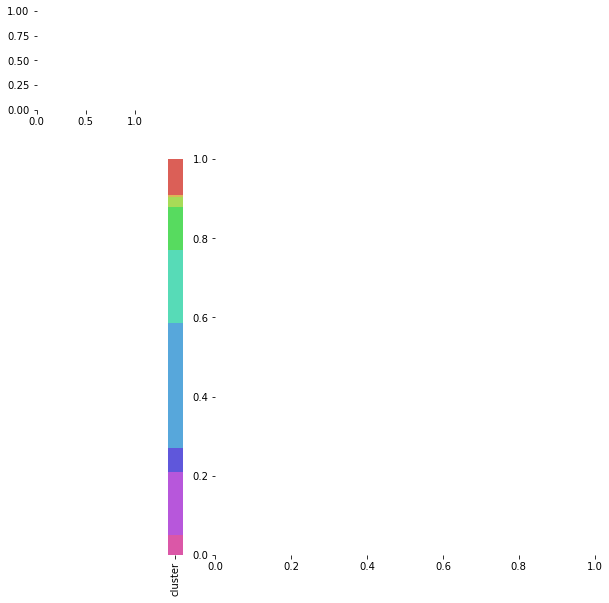

In [33]:
%%time
#sort the df with the cluster numbers.
# df = df.sort_values('cluster')

# #pop the cluster column
# cluster_uniq = df.pop("cluster")

#use one color per cluster group 
lut = dict(zip(cluster_uniq.unique(), seaborn.hls_palette(9)))
row_colors_clust = cluster_uniq.map(lut)

#plot
seaborn.clustermap(df, cmap='bwr', col_cluster=False, row_cluster=False,
                   row_colors= row_colors_clust, 
                   yticklabels= '', xticklabels = '',
                   cbar_kws={'label':'expression [log2(tpm+1)]'})
plt.show()
plt.close()